In [182]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from itertools import product
from tqdm import tqdm

In [349]:
def basis_function(img, u=0, v=0):
    X, Y = img.shape
    f_img = np.zeros((X,Y), dtype=np.complex)
    for x in range(X):
        for y in range(Y):
            f_uv = np.exp(2j * np.pi * (u*x + v*y))
            f_img[x,y] = f_uv
    ret, bw_img = cv2.threshold(f_img.imag,f_img.imag.mean(),f_img.imag.max(), cv2.THRESH_BINARY)
    return bw_img

def dfft(img):
    X, Y = img.shape
    f_img = np.zeros((X,Y), dtype=np.complex)
    x = np.arange(X)
    y = np.arange(Y)
    for m in range(X):
        e = np.exp(2j * np.pi * (m*x/X))
        dot_mn = np.dot(e, img)
        f_img[m] = dot_mn
        
    f_img = (1 / np.sqrt(Y)) * f_img
    for n in range(Y):
        e = np.exp(2j * np.pi * (n*y/Y))
        dot_mn = np.dot(f_img, e)
        f_img[:,n] = (1/np.sqrt(X)) * dot_mn
    mag = np.sqrt(f_img.imag ** 2 + f_img.real ** 2)
    phase = np.arctan2(f_img.imag, f_img.real)
    return f_img, mag, phase

def idfft(img):
    X, Y = img.shape
    f_img = np.zeros((X,Y), dtype=np.complex)
    x = np.arange(X)
    y = np.arange(Y)
    for m in range(X):
        e = np.exp(-2j * np.pi * (m*x/X))
        dot_mn = np.dot(e, img)
        f_img[m] = dot_mn
        
    f_img = (1 / np.sqrt(Y)) * f_img
    for n in range(Y):
        e = np.exp(-2j * np.pi * (n*y/Y))
        dot_mn = np.dot(f_img, e)
        f_img[:,n] = (1/np.sqrt(X)) * dot_mn
    mag = np.sqrt(f_img.imag ** 2 + f_img.real ** 2)
    phase = np.arctan2(f_img.imag, f_img.real)
    return f_img, mag, phase

def scale_img(img, qmin=0, qmax=255):
    max_val = img.max()
    min_val = img.min()
    scaled_img = ((img - min_val)/(max_val - min_val)) * (qmax - qmin)
    
    return scaled_img.astype(np.uint8)
# def dfft(img)

## Basis Functions

In [375]:
img_1 = np.zeros((60, 60))

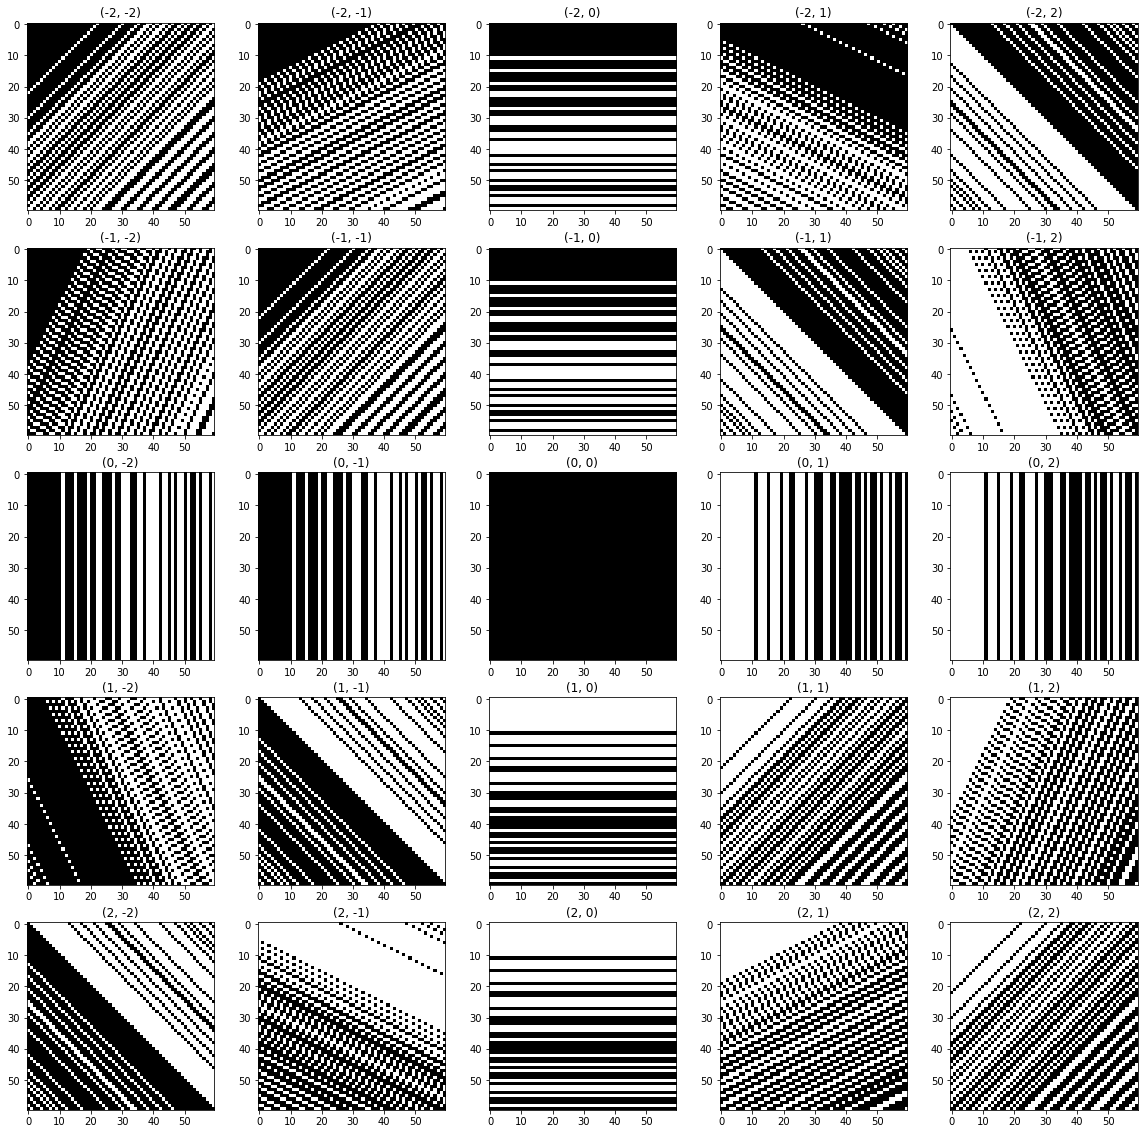

In [376]:
uv_vals = list(product([-2,-1,0,1,2], repeat=2))

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20,20))

for ax, uv in zip(axes.flatten(), uv_vals):
    u, v = uv
    ax.set_title(uv)
    ax.imshow(basis_function(img_1, u, v), cmap=cm.gray)

## Phase and Magnitude

(418, 350)


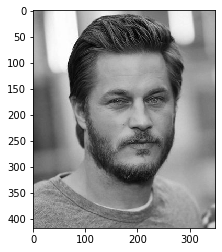

In [336]:
img_2 = cv2.imread('images/travisfimmel.jpg', cv2.IMREAD_GRAYSCALE)
print(img_2.shape)
plt.imshow(img_2, cmap=cm.gray)
plt.show()

/home/kam/.virtualenvs/dl4cv/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/home/kam/.virtualenvs/dl4cv/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


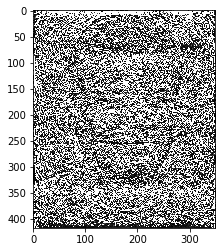

In [353]:
f_img, mag, phase = dfft(img_2)
f_img.shape
f_img_2, ma, phas = idfft(phase)

plt.imshow(10*np.log10(phas), cmap=cm.gray_r)

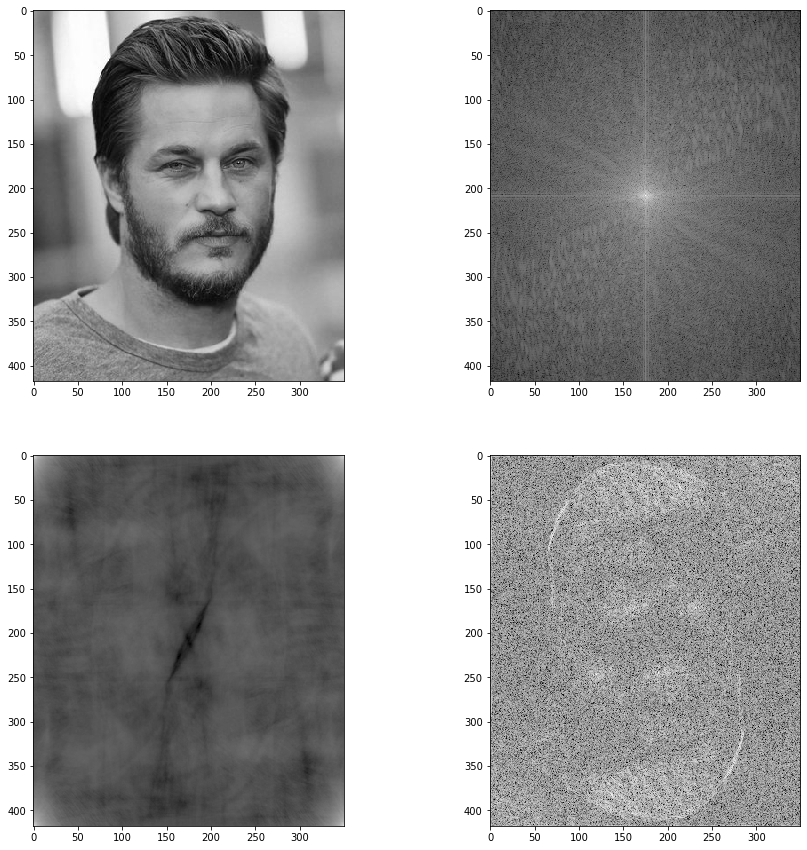

In [374]:
fft_img = np.fft.fft2(img_2)
# f_img_2 = np.fft.ifft2(np.absolute(f_img_1))

shifted_img = np.fft.fftshift(fft_img)
ifft_img_mag = np.fft.ifft2(np.absolute(shifted_img))
ifft_img_phase = np.fft.ifft2(np.angle(fft_img))

imgs = [img_2, 10* np.log10(np.absolute(shifted_img)), 10* np.log10(np.absolute(ifft_img_mag)), 
                                                                    10* np.log10(np.absolute(ifft_img_phase))]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

for ax, img in zip(axs.flatten(), imgs):
    ax.imshow(img, cmap=cm.gray)

In [345]:
dft_img = cv2.dft(img_2.astype(np.float), flags = cv2.DFT_COMPLEX_OUTPUT)
# dft_shift = np.fft.fftshift(dft_img)


magnitude_spectrum = cv2.magnitude(dft_img[:,:,0],dft_img[:,:,1])
phase = cv2.phase(dft_img[:,:,0],dft_img[:,:,1])

idft_img = cv2.idft(phase, flags = cv2.DFT_COMPLEX_OUTPUT)

# plt.imshow(magnitude_spectrum, cmap=cm.gray)
# plt.imshow(idft_img, cmap=cm.gray_r)
idft_img

array([[ 4.59978236e+05, -2.89592177e+05, -6.33028118e+02, ...,
         1.00900271e+05,  1.37518142e+03,  2.95592102e+05],
       [-2.02895229e+03, -7.72068136e+02,  2.82933372e+03, ...,
        -6.57256895e+02,  4.69123893e+02, -7.45999143e+02],
       [-4.19974570e+03, -4.45971693e+03,  2.07341149e+03, ...,
        -6.14797373e+02,  1.69568061e+03,  1.47732418e+03],
       ...,
       [ 2.05265564e+03, -1.05961822e+02, -4.10507765e+02, ...,
         5.83464895e+02, -1.77805001e+02, -2.00066553e+03],
       [ 4.24998979e+03,  2.95039360e+03, -1.65856915e+03, ...,
         9.50883500e+02, -1.91681100e+03, -2.98664744e+03],
       [ 2.36368448e+03, -1.44783814e+02, -1.95111896e+02, ...,
         1.11151653e+03, -2.43373974e+03, -1.70852875e+02]])

## Gibbs Phenomenon

In [382]:
def gibbs(img, D):
    X, Y = img.shape
    f_img = np.fft.fft2(img)
    f_img = np.fft.fftshift(f_img)
    f = np.zeros((X,Y), dtype=np.complex)
    c_x, c_y = X/2, Y/2
    for u in range(X):
        for v in range(Y):
            d_uv = np.sqrt((u - c_x) ** 2 + (v - c_y) ** 2)
            if d_uv <= D:
                f[u,v] = f_img[u,v]
            else:
                f[u,v] = 0
                
    final = np.fft.ifft2(f)
    
    return np.absolute(final)

(418, 350)


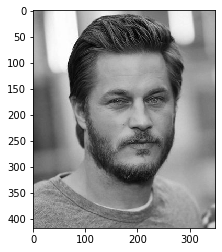

In [396]:
img_3 = cv2.imread('images/travisfimmel.jpg', cv2.IMREAD_GRAYSCALE)
print(img_3.shape)
plt.imshow(img_3, cmap=cm.gray)
plt.show()

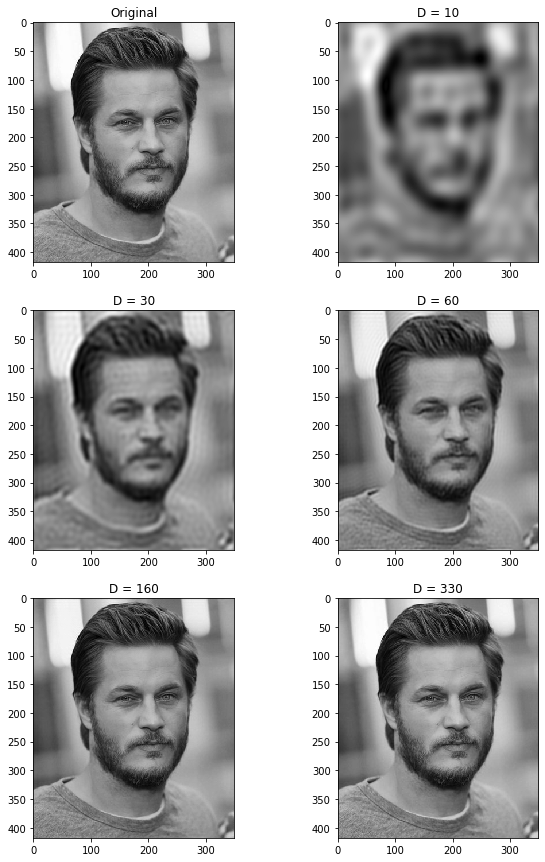

In [539]:
Ds = [10,30,60,160, 330]
imgs = [img_3]
for D in Ds:
    imgs.append(gibbs(img_3, D))
    
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,15))

axes.flatten()[0].set_title('Original')
for ax, img in zip(axes.flatten(), imgs):
    ax.imshow(img, cmap=cm.gray)
    
for i in range(1, 6):
    axes.flatten()[i].set_title('D = {}'.format(Ds[i-1]))

## Image Degradation and Restoration

(600, 600)


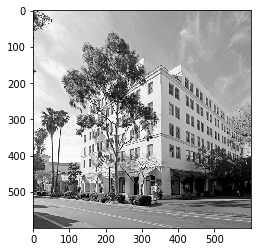

In [533]:
img_4 = cv2.imread('images/balboa_building_conference_room_600pxsq.png', cv2.IMREAD_GRAYSCALE)
print(img_4.shape)
plt.imshow(img_4, cmap=cm.gray)
plt.show()

In [534]:
def blur(img, b_sig, n_sig = 0):
    x, y = img.shape
    kernel = np.zeros((x,y))
    noise = np.zeros((x, y))
    for m in range(x):
        for n in range(y):
            kernel[m,n] = (1 / (2 * np.pi * b_sig)) * np.exp(-(m **2 + n**2)/(2 * b_sig ** 2))
            noise[m,n] = (1 / (2 * np.pi * n_sig)) * np.exp(-(m **2 + n**2)/(2 * n_sig ** 2))
    f_ker = np.fft.fft2(kernel)
    f_ker_s = np.fft.fftshift(f_ker)
    
    f_noi = np.fft.fft2(kernel)
    f_noi_s = np.fft.fftshift(f_ker)
    
    f_img = np.fft.fft2(img)
    f_img_s = np.fft.fftshift(f_img)
    
    
    
    
    blur_img = f_img * f_ker + f_noi
    final = np.fft.ifft2(blur_img)
    return scale_img(np.absolute(final)), f_ker

def weiner_deblur(b_img, ker, K):
    b_fft = np.fft.fft2(b_img)
    H_conj = np.conj(ker)
    H_abs = np.absolute(ker)
    
    W_uv = H_conj / (H_abs ** 2 + K)
    
    f_img = W_uv * b_fft
    final = np.fft.ifft2(f_img)
    return scale_img(np.absolute(final))

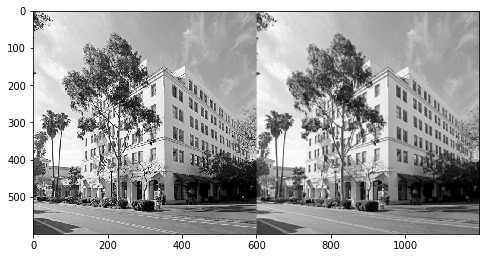

In [535]:
k, ker = blur(img_4, 1.5, 0.3)
f = np.hstack((img_4, k))
plt.figure(figsize=(8,6))
plt.imshow(f, cmap = cm.gray)

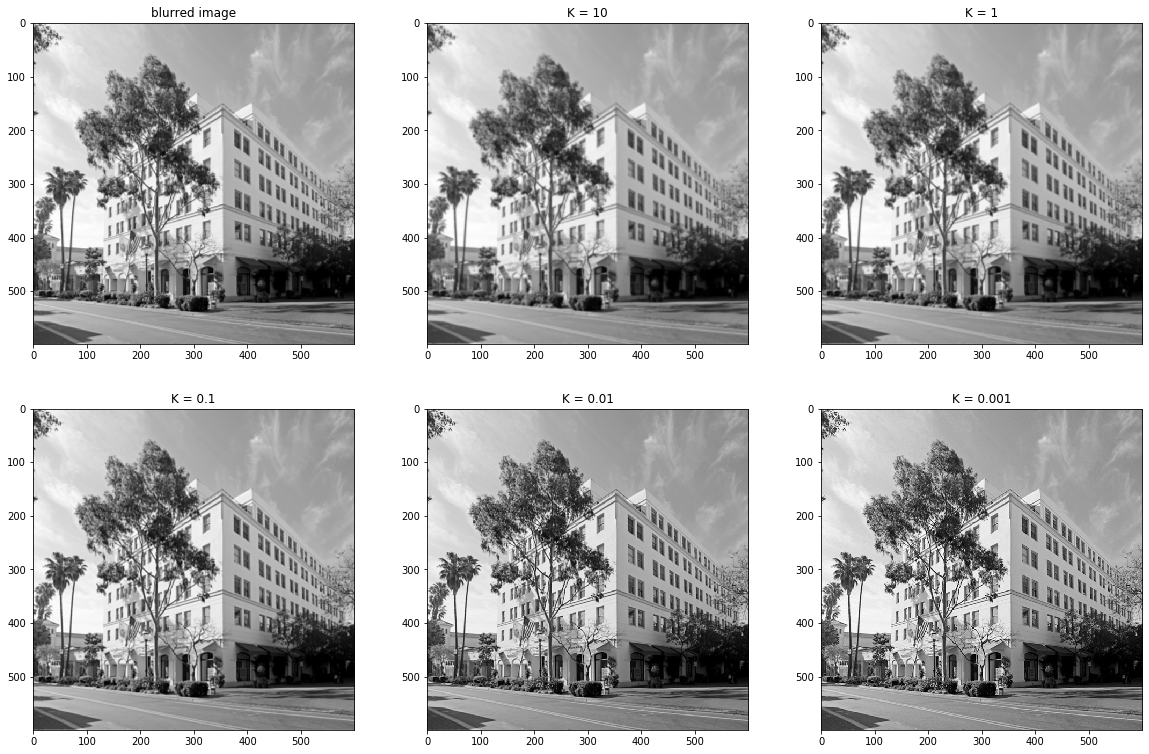

In [536]:
Ks = [10, 1, 1e-1, 1e-2, 1e-3]

imgs = [k]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,13))

for K in Ks:
    imgs.append(weiner_deblur(k, ker, K))
axes.flatten()[0].set_title('blurred image')
for ax, img in zip(axes.flatten(), imgs):
    ax.imshow(img, cmap=cm.gray)
    
for i in range(1, 6):
    axes.flatten()[i].set_title('K = {}'.format(Ks[i-1]))

## Deblurring with Weiner Filter

(320, 512)


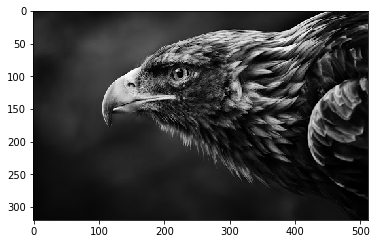

In [522]:
img_5 = cv2.imread('images/unnamed.jpg', cv2.IMREAD_GRAYSCALE)
print(img_5.shape)
plt.imshow(img_5, cmap=cm.gray)
plt.show()

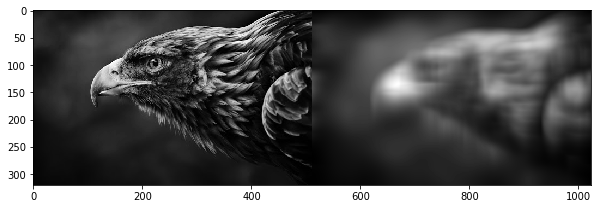

In [523]:
b_img, ker = blur(img_5, 20, 0.3)
s_img = np.hstack((img_5, b_img))
plt.figure(figsize=(10,8))
plt.imshow(s_img, cmap = cm.gray)

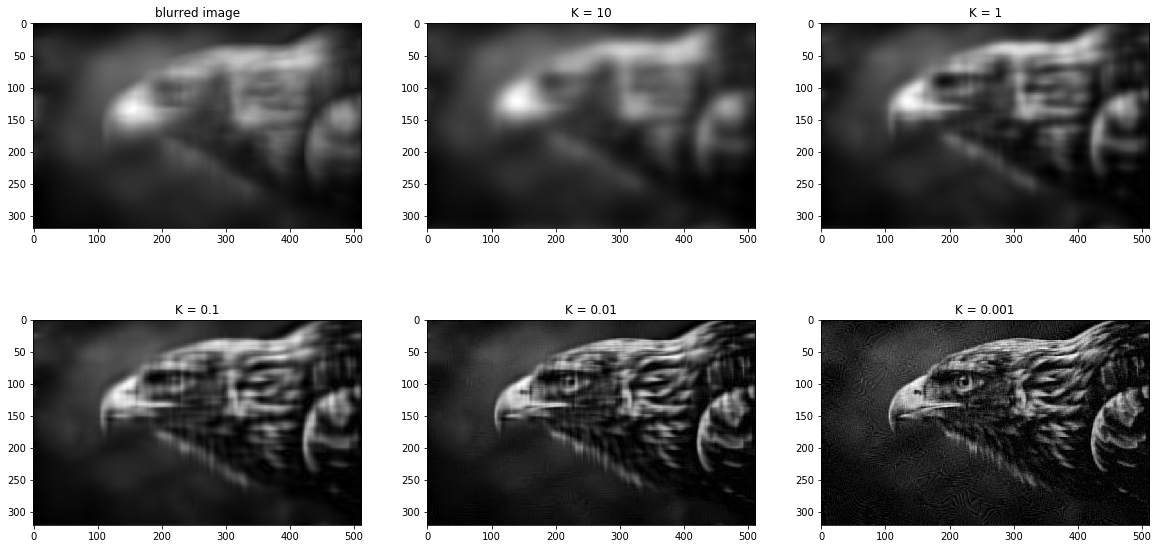

In [531]:
Ks = [10, 1, 1e-1, 1e-2, 1e-3]

imgs = [b_img]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

for K in Ks:
    imgs.append(weiner_deblur(b_img, ker, K))
axes.flatten()[0].set_title('blurred image')
for ax, img in zip(axes.flatten(), imgs):
    ax.imshow(img, cmap=cm.gray)
    
for i in range(1, 6):
    axes.flatten()[i].set_title('K = {}'.format(Ks[i-1]))